# ROC AUC Multi Class Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Preparing dataset

In [4]:
from sklearn.datasets import load_iris
dataIris = load_iris()
# dir(dataIris)
df = pd.DataFrame(
    dataIris['data'],
    # columns = dataIris['feature_names']
    columns = ['SL', 'SW', 'PL', 'PW']
)
df['target'] = dataIris['target']
df['spesies'] = df['target'].apply(
    lambda x: dataIris['target_names'][x])
df.head()

,SL,SW,PL,PW,target,spesies
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(
    df[['SL', 'SW', 'PL', 'PW']], df['target'])

### 2. Model Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
modelA = LogisticRegression(solver='lbfgs', multi_class='auto')
modelB = LogisticRegression(solver='liblinear', multi_class='auto')

In [33]:
modelA.fit(xtr, ytr)
modelB.fit(xtr, ytr)

c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### 3. ROC AUC

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [16]:
fpra0, tpra0, thrsa0 = roc_curve(
    ytr, modelA.predict_proba(xtr)[:, 0], pos_label=0)
fprb0, tprb0, thresb0 = roc_curve(
    ytr, modelB.predict_proba(xtr)[:, 0], pos_label=0)

In [17]:
fpra1, tpra1, thrsa1 = roc_curve(
    ytr, modelA.predict_proba(xtr)[:, 1], pos_label=1)
fprb1, tprb1, thresb1 = roc_curve(
    ytr, modelB.predict_proba(xtr)[:, 1], pos_label=1)

In [18]:
fpra2, tpra2, thrsa2 = roc_curve(
    ytr, modelA.predict_proba(xtr)[:, 2], pos_label=2)
fprb2, tprb2, thresb2 = roc_curve(
    ytr, modelB.predict_proba(xtr)[:, 2], pos_label=2)

In [28]:
aucA0 = auc(fpra0, tpra0)
aucB0 = auc(fprb0, tprb0)
aucA1 = auc(fpra1, tpra1)
aucB1 = auc(fprb1, tprb1)
aucA2 = auc(fpra2, tpra2)
aucB2 = auc(fprb2, tprb2)
aucA0, aucB0, aucA1, aucB1, aucA2, aucB2

(1.0, 1.0, 0.996875, 0.9819444444444444, 0.9963963963963963, 0.983063063063063)

In [29]:
auA = roc_auc_score(
    np.array(yts.tolist()), 
    modelA.predict_proba(xts), labels=[0,1,2], multi_class='ovo',
    average='macro'
)
auB = roc_auc_score(
    np.array(yts.tolist()), 
    modelB.predict_proba(xts), labels=[0,1,2], multi_class='ovo',
    average='macro'
)
auA, auB

(1.0, 0.9961538461538462)

Text(0, 0.5, 'True Positif Rate')

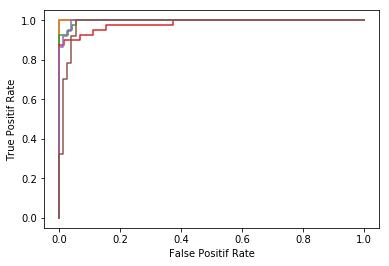

In [31]:
plt.plot(fpra0, tpra0)
plt.plot(fprb0, tprb0)
plt.plot(fpra1, tpra1)
plt.plot(fprb1, tprb1)
plt.plot(fpra2, tpra2)
plt.plot(fprb2, tprb2)
plt.xlabel('False Positif Rate')
plt.ylabel('True Positif Rate')